# Plant Monitoring 

## Importing libraries

In [138]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Preprocessing

### Training Image preprocessing

In [140]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 301 files belonging to 14 classes.


### Validation Image Preprocessing

In [142]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 95 files belonging to 14 classes.


## Building Model

In [144]:
cnn = tf.keras.models.Sequential()

### Building Convolution Layer

In [146]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

C:\Users\$8CUJ00-BGKRQC8B3RAL\Desktop\Plant identification and verification\tensorflow_env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [148]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [150]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [152]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [154]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [156]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [158]:
cnn.add(tf.keras.layers.Flatten())

In [160]:
cnn.add(tf.keras.layers.Dense(units=2500,activation='relu'))

In [162]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [164]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=14,activation='softmax'))

### Compiling and Training Phase

In [166]:
import tensorflow as tf

cnn.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [168]:
cnn.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 2500)           │     5,122,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 2500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 14)             │        35,014 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,869,738 (37.65 MB)

 Trainable params: 9,869,738 (37.65 MB)

 Non-trainable params: 0 (0.00 B)

In [232]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step - accuracy: 0.8289 - loss: 0.5095 - val_accuracy: 0.4316 - val_loss: 1.5452
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 52s 5s/step - accuracy: 0.8916 - loss: 0.3853 - val_accuracy: 0.4632 - val_loss: 1.5835
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 52s 5s/step - accuracy: 0.9391 - loss: 0.2403 - val_accuracy: 0.5158 - val_loss: 1.5143
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 52s 5s/step - accuracy: 0.9427 - loss: 0.2577 - val_accuracy: 0.4632 - val_loss: 1.6232
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 53s 5s/step - accuracy: 0.9633 - loss: 0.1869 - val_accuracy: 0.4211 - val_loss: 1.5282
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 53s 5s/step - accuracy: 0.9703 - loss: 0.1167 - val_accuracy: 0.4737 - val_loss: 1.5286
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 55s 5s/step - accuracy: 0.9507 - loss: 0.1344 - val_accuracy: 0.5579 - val_loss: 1.5031
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 54s 5s/step - accuracy: 0.9383 - loss: 0.1817 - val_accuracy: 0.5053 - val_loss:

## Evaluating Model

In [234]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

10/10 ━━━━━━━━━━━━━━━━━━━━ 32s 3s/step - accuracy: 1.0000 - loss: 0.0186
Training accuracy: 1.0


In [238]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.5627 - loss: 1.3501
Validation accuracy: 0.5473684072494507


### Saving Model

In [242]:
cnn.save('trained_plant_disease_model.keras')

In [244]:
training_history.history #Return Dictionary of history

{'accuracy': [0.8172757625579834,
  0.8970099687576294,
  0.9269102811813354,
  0.9401993155479431,
  0.9634551405906677,
  0.9667773842811584,
  0.9468438625335693,
  0.9501661062240601,
  0.9767441749572754,
  0.9800664186477661],
 'loss': [0.5515967011451721,
  0.36819207668304443,
  0.2745167315006256,
  0.267717570066452,
  0.17919428646564484,
  0.11518603563308716,
  0.14513596892356873,
  0.15691344439983368,
  0.11113663017749786,
  0.07443364709615707],
 'val_accuracy': [0.43157893419265747,
  0.46315789222717285,
  0.5157894492149353,
  0.46315789222717285,
  0.42105263471603394,
  0.4736842215061188,
  0.557894766330719,
  0.5052631497383118,
  0.5263158082962036,
  0.5473684072494507],
 'val_loss': [1.545200228691101,
  1.5835102796554565,
  1.5143153667449951,
  1.6231929063796997,
  1.5282483100891113,
  1.5285604000091553,
  1.5030781030654907,
  1.4956790208816528,
  1.3740265369415283,
  1.3356860876083374]}

In [246]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [248]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


## Accuracy Visualization

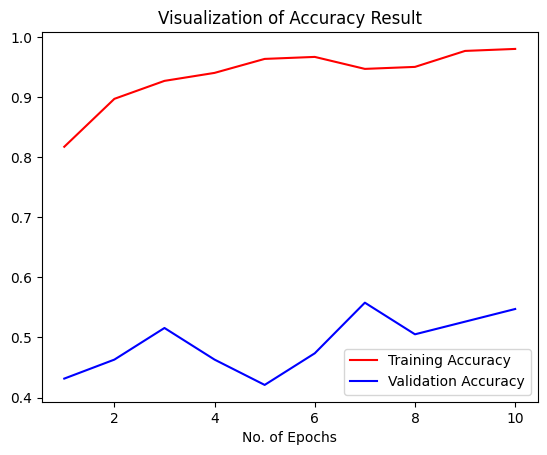

In [250]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

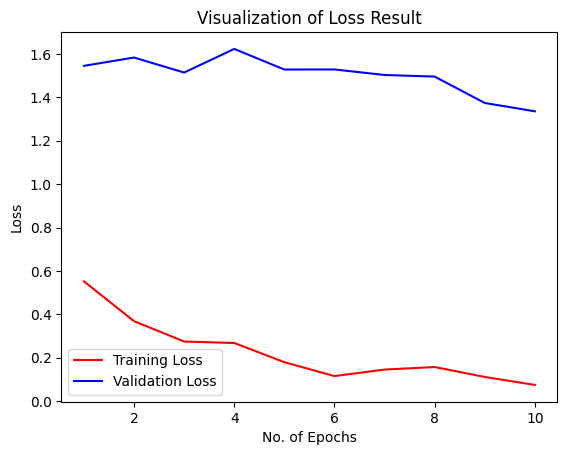

In [254]:
epochs = [i for i in range(1, 11)]  # Adjust range to match the number of epochs

# Plot Training and Validation Loss
plt.plot(epochs,training_history.history['loss'], color='red', label='Training Loss')
plt.plot(epochs,training_history.history['val_loss'], color='blue', label='Validation Loss')
plt.xlabel('No. of Epochs')
plt.ylabel('Loss')
plt.title('Visualization of Loss Result')
plt.legend()
plt.show()


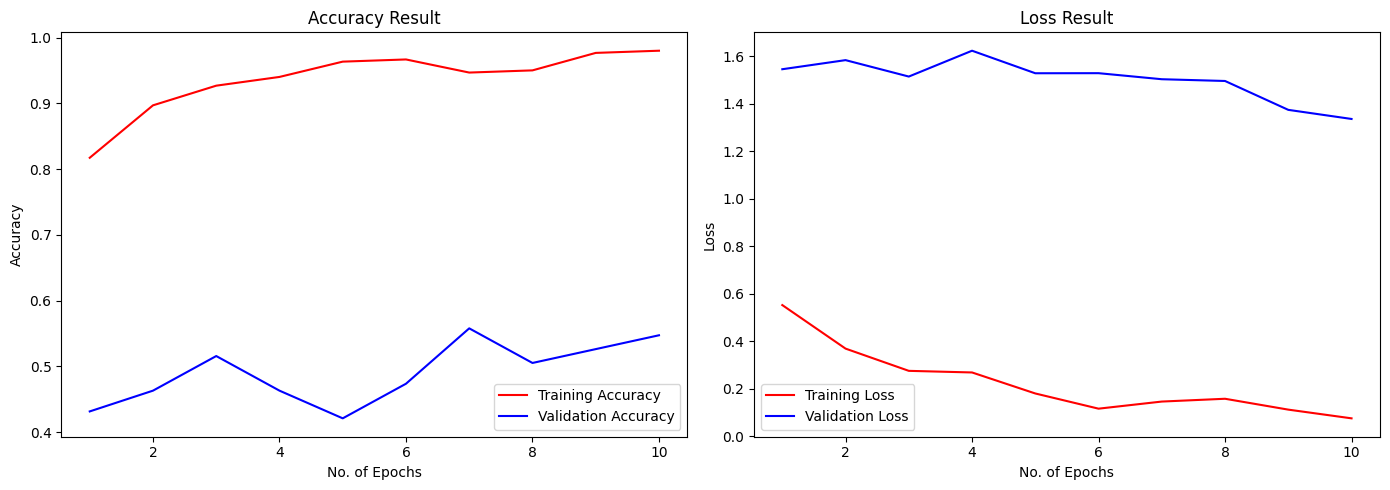

In [256]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Accuracy Plot
ax[0].plot(epochs, training_history.history['accuracy'], color='red', label='Training Accuracy')
ax[0].plot(epochs, training_history.history['val_accuracy'], color='blue', label='Validation Accuracy')
ax[0].set_title('Accuracy Result')
ax[0].set_xlabel('No. of Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend()

# Loss Plot
ax[1].plot(epochs, training_history.history['loss'], color='red', label='Training Loss')
ax[1].plot(epochs, training_history.history['val_loss'], color='blue', label='Validation Loss')
ax[1].set_title('Loss Result')
ax[1].set_xlabel('No. of Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend()

plt.tight_layout()
plt.show()

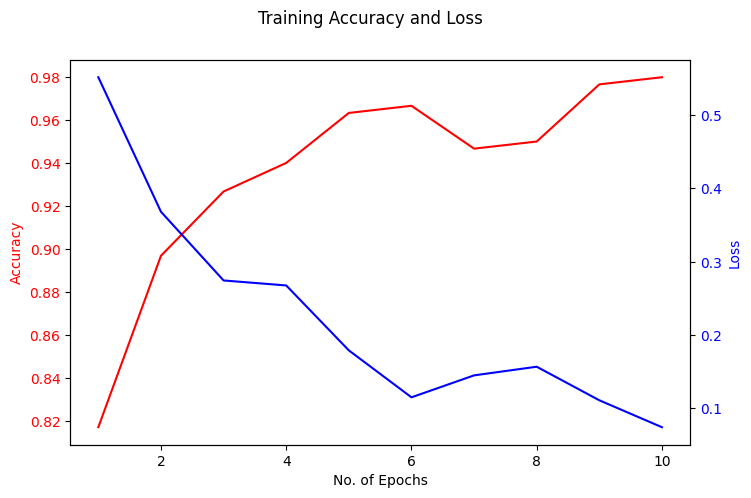

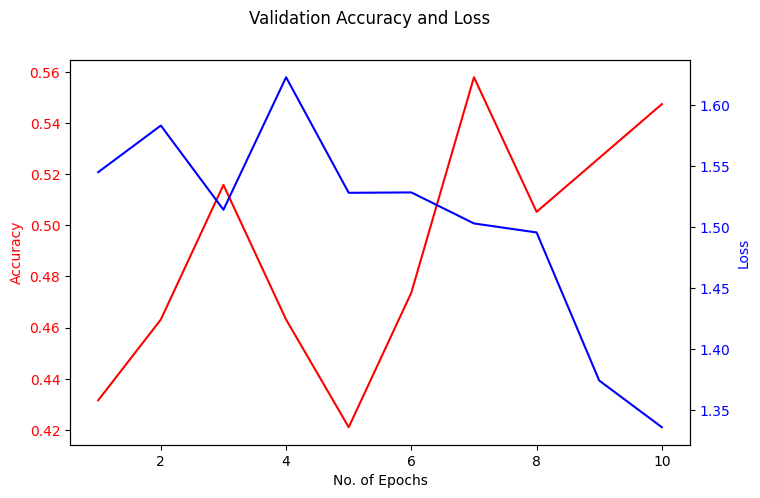

In [258]:
# Plot for Training Accuracy and Loss
fig, ax1 = plt.subplots(figsize=(8, 5))

# Plot Training Accuracy
ax1.plot(epochs, training_history.history['accuracy'], color='red', label='Training Accuracy')
ax1.set_xlabel('No. of Epochs')
ax1.set_ylabel('Accuracy', color='red')
ax1.tick_params(axis='y', labelcolor='red')

# Create a twin y-axis for Training Loss
ax2 = ax1.twinx()
ax2.plot(epochs, training_history.history['loss'], color='blue', label='Training Loss')
ax2.set_ylabel('Loss', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

fig.suptitle('Training Accuracy and Loss')
plt.show()

# Plot for Validation Accuracy and Loss
fig, ax1 = plt.subplots(figsize=(8, 5))

# Plot Validation Accuracy
ax1.plot(epochs, training_history.history['val_accuracy'], color='red', label='Validation Accuracy')
ax1.set_xlabel('No. of Epochs')
ax1.set_ylabel('Accuracy', color='red')
ax1.tick_params(axis='y', labelcolor='red')

# Create a twin y-axis for Validation Loss
ax2 = ax1.twinx()
ax2.plot(epochs, training_history.history['val_loss'], color='blue', label='Validation Loss')
ax2.set_ylabel('Loss', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

fig.suptitle('Validation Accuracy and Loss')
plt.show()

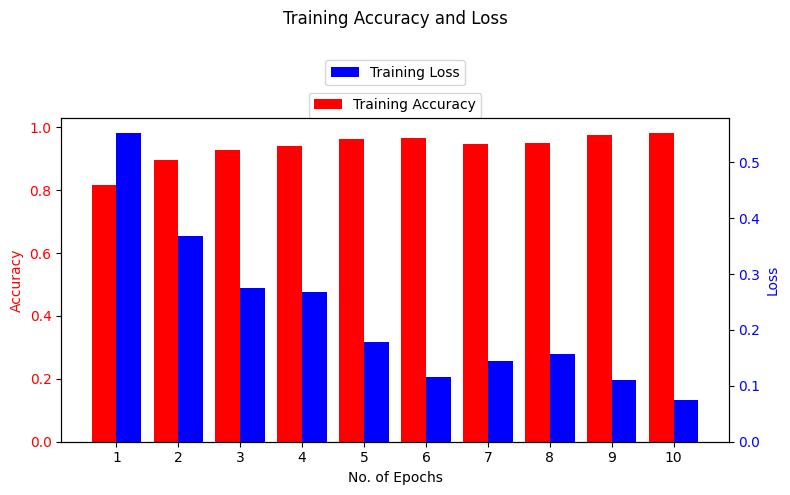

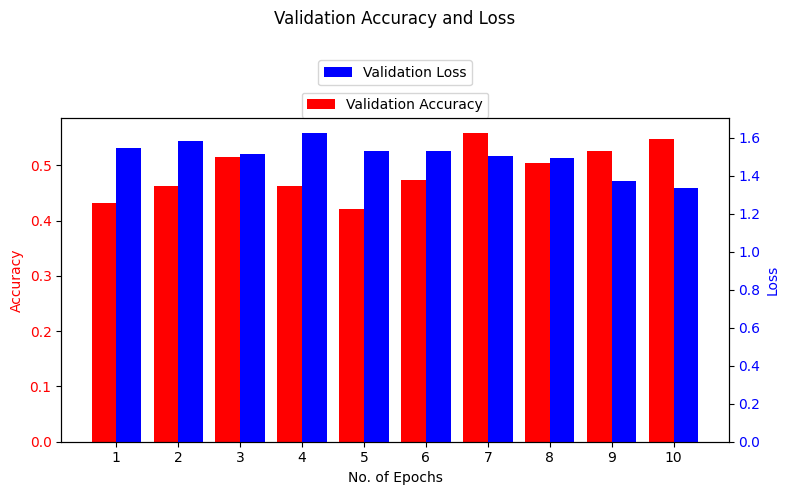

In [260]:
import numpy as np

# Set width for the bars
bar_width = 0.4  # Width of each bar
epochs = np.arange(1, 11)  # Epochs from 1 to 10

# Training Accuracy and Loss
fig, ax1 = plt.subplots(figsize=(8, 5))

# Bars for Training Accuracy
ax1.bar(epochs - bar_width / 2, training_history.history['accuracy'], bar_width, color='red', label='Training Accuracy')
ax1.set_xlabel('No. of Epochs')
ax1.set_ylabel('Accuracy', color='red')
ax1.tick_params(axis='y', labelcolor='red')

# Bars for Training Loss (on second y-axis)
ax2 = ax1.twinx()
ax2.bar(epochs + bar_width / 2, training_history.history['loss'], bar_width, color='blue', label='Training Loss')
ax2.set_ylabel('Loss', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Set x-axis ticks
ax1.set_xticks(epochs)  # Ensure all epochs from 1 to 10 are shown

# Add Title and Legends
fig.suptitle('Training Accuracy and Loss')
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=2)
ax2.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=2)
plt.tight_layout()
plt.show()

# Validation Accuracy and Loss
fig, ax1 = plt.subplots(figsize=(8, 5))

# Bars for Validation Accuracy
ax1.bar(epochs - bar_width / 2, training_history.history['val_accuracy'], bar_width, color='red', label='Validation Accuracy')
ax1.set_xlabel('No. of Epochs')
ax1.set_ylabel('Accuracy', color='red')
ax1.tick_params(axis='y', labelcolor='red')

# Bars for Validation Loss (on second y-axis)
ax2 = ax1.twinx()
ax2.bar(epochs + bar_width / 2, training_history.history['val_loss'], bar_width, color='blue', label='Validation Loss')
ax2.set_ylabel('Loss', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Set x-axis ticks
ax1.set_xticks(epochs)  # Ensure all epochs from 1 to 10 are shown

# Add Title and Legends
fig.suptitle('Validation Accuracy and Loss')
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=2)
ax2.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=2)
plt.tight_layout()
plt.show()

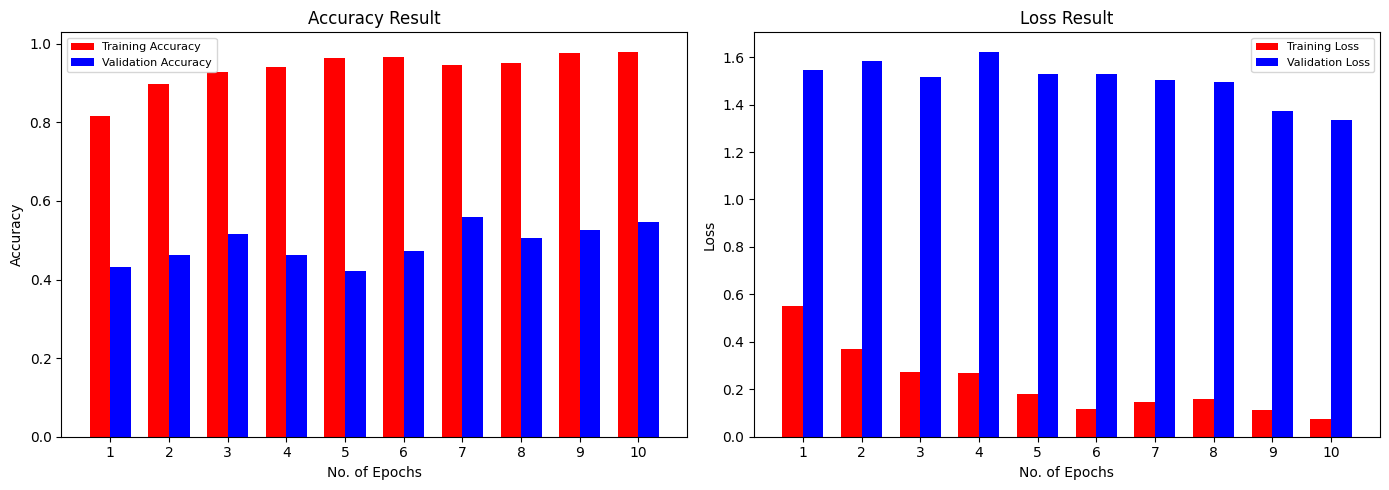

In [262]:
import numpy as np

# Define the width of the bars
bar_width = 0.35  # Width of the bars
epochs = np.arange(1, len(training_history.history['accuracy']) + 1)  # Epoch numbers

fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Accuracy Plot (Bar Chart)
ax[0].bar(epochs - bar_width / 2, training_history.history['accuracy'], bar_width, color='red', label='Training Accuracy')
ax[0].bar(epochs + bar_width / 2, training_history.history['val_accuracy'], bar_width, color='blue', label='Validation Accuracy')
ax[0].set_title('Accuracy Result')
ax[0].set_xlabel('No. of Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].set_xticks(epochs)  # Ensure all epochs are labeled
ax[0].legend(fontsize=8)  # Set smaller font size for legend

# Loss Plot (Bar Chart)
ax[1].bar(epochs - bar_width / 2, training_history.history['loss'], bar_width, color='red', label='Training Loss')
ax[1].bar(epochs + bar_width / 2, training_history.history['val_loss'], bar_width, color='blue', label='Validation Loss')
ax[1].set_title('Loss Result')
ax[1].set_xlabel('No. of Epochs')
ax[1].set_ylabel('Loss')
ax[1].set_xticks(epochs)  # Ensure all epochs are labeled
ax[1].legend(fontsize=8)  # Set smaller font size for legend

plt.tight_layout()
plt.show()


## Some other metrics for model evaluation

In [264]:
class_name = validation_set.class_names

In [266]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 95 files belonging to 14 classes.


In [268]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

95/95 ━━━━━━━━━━━━━━━━━━━━ 7s 72ms/step


In [270]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [276]:
Y_true

<tf.Tensor: shape=(95,), dtype=int64, numpy=
array([ 0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,
        2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,
        4,  4,  4,  4,  5,  6,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10,
       10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12,
       12, 12, 13, 13, 13, 13, 13, 13, 13, 13])>

In [278]:
predicted_categories

<tf.Tensor: shape=(95,), dtype=int64, numpy=
array([ 7,  7,  0,  0,  0,  0,  1,  1,  8,  4,  1,  1,  1,  1,  2,  0,  2,
        0, 12,  2,  2,  2,  3,  3,  9,  0, 11,  9, 12, 11,  4,  4,  0, 13,
        4,  0,  9,  4,  5,  6, 13,  0, 13, 12, 13,  9,  7,  2,  8,  8,  2,
        8,  8,  8,  8,  8,  9,  9,  9, 12,  0,  9,  2,  9, 10,  0, 10, 13,
       12, 12, 10, 10, 11, 13,  4, 13, 13,  4, 11, 13, 12, 12, 12,  9, 12,
       12, 12,  2, 13, 13,  4, 13, 12,  2, 13])>

In [280]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [282]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                         precision    recall  f1-score   support

       Black grass49_52       0.33      0.67      0.44         6
          Charlock33_36       1.00      0.75      0.86         8
          Cleavers25_28       0.50      0.62      0.56         8
       Cranes_bill41_44       1.00      0.25      0.40         8
           Fat Hen37_40       0.50      0.50      0.50         8
Fersken pileurt_dead_29       1.00      1.00      1.00         1
      Field Pansy 45_47       1.00      1.00      1.00         1
  Loose Silky_bent53_56       0.33      0.12      0.18         8
                Majs1_4       0.88      0.88      0.88         8
         Sugar beet9_12       0.50      0.62      0.56         8
               Wheat5_8       1.00      0.50      0.67         8
         chickweed17_20       0.50      0.29      0.36         7
 scentless mayweed13_16       0.46      0.75      0.57         8
 shepherd's_purse 21_24       0.31      0.50      0.38         8

               accuracy

In [284]:
import pandas as pd
from sklearn.metrics import classification_report

# Generate the classification report as a dictionary
report_dict = classification_report(Y_true, predicted_categories, target_names=class_name, output_dict=True)

# Convert the dictionary into a DataFrame
report_df = pd.DataFrame(report_dict).transpose()

# Save the DataFrame to an Excel file
report_df.to_excel("classification_report.xlsx", index=True)

print("Classification report saved to 'classification_report.xlsx'")


Classification report saved to 'classification_report.xlsx'


### Confusion Matrix Visualization

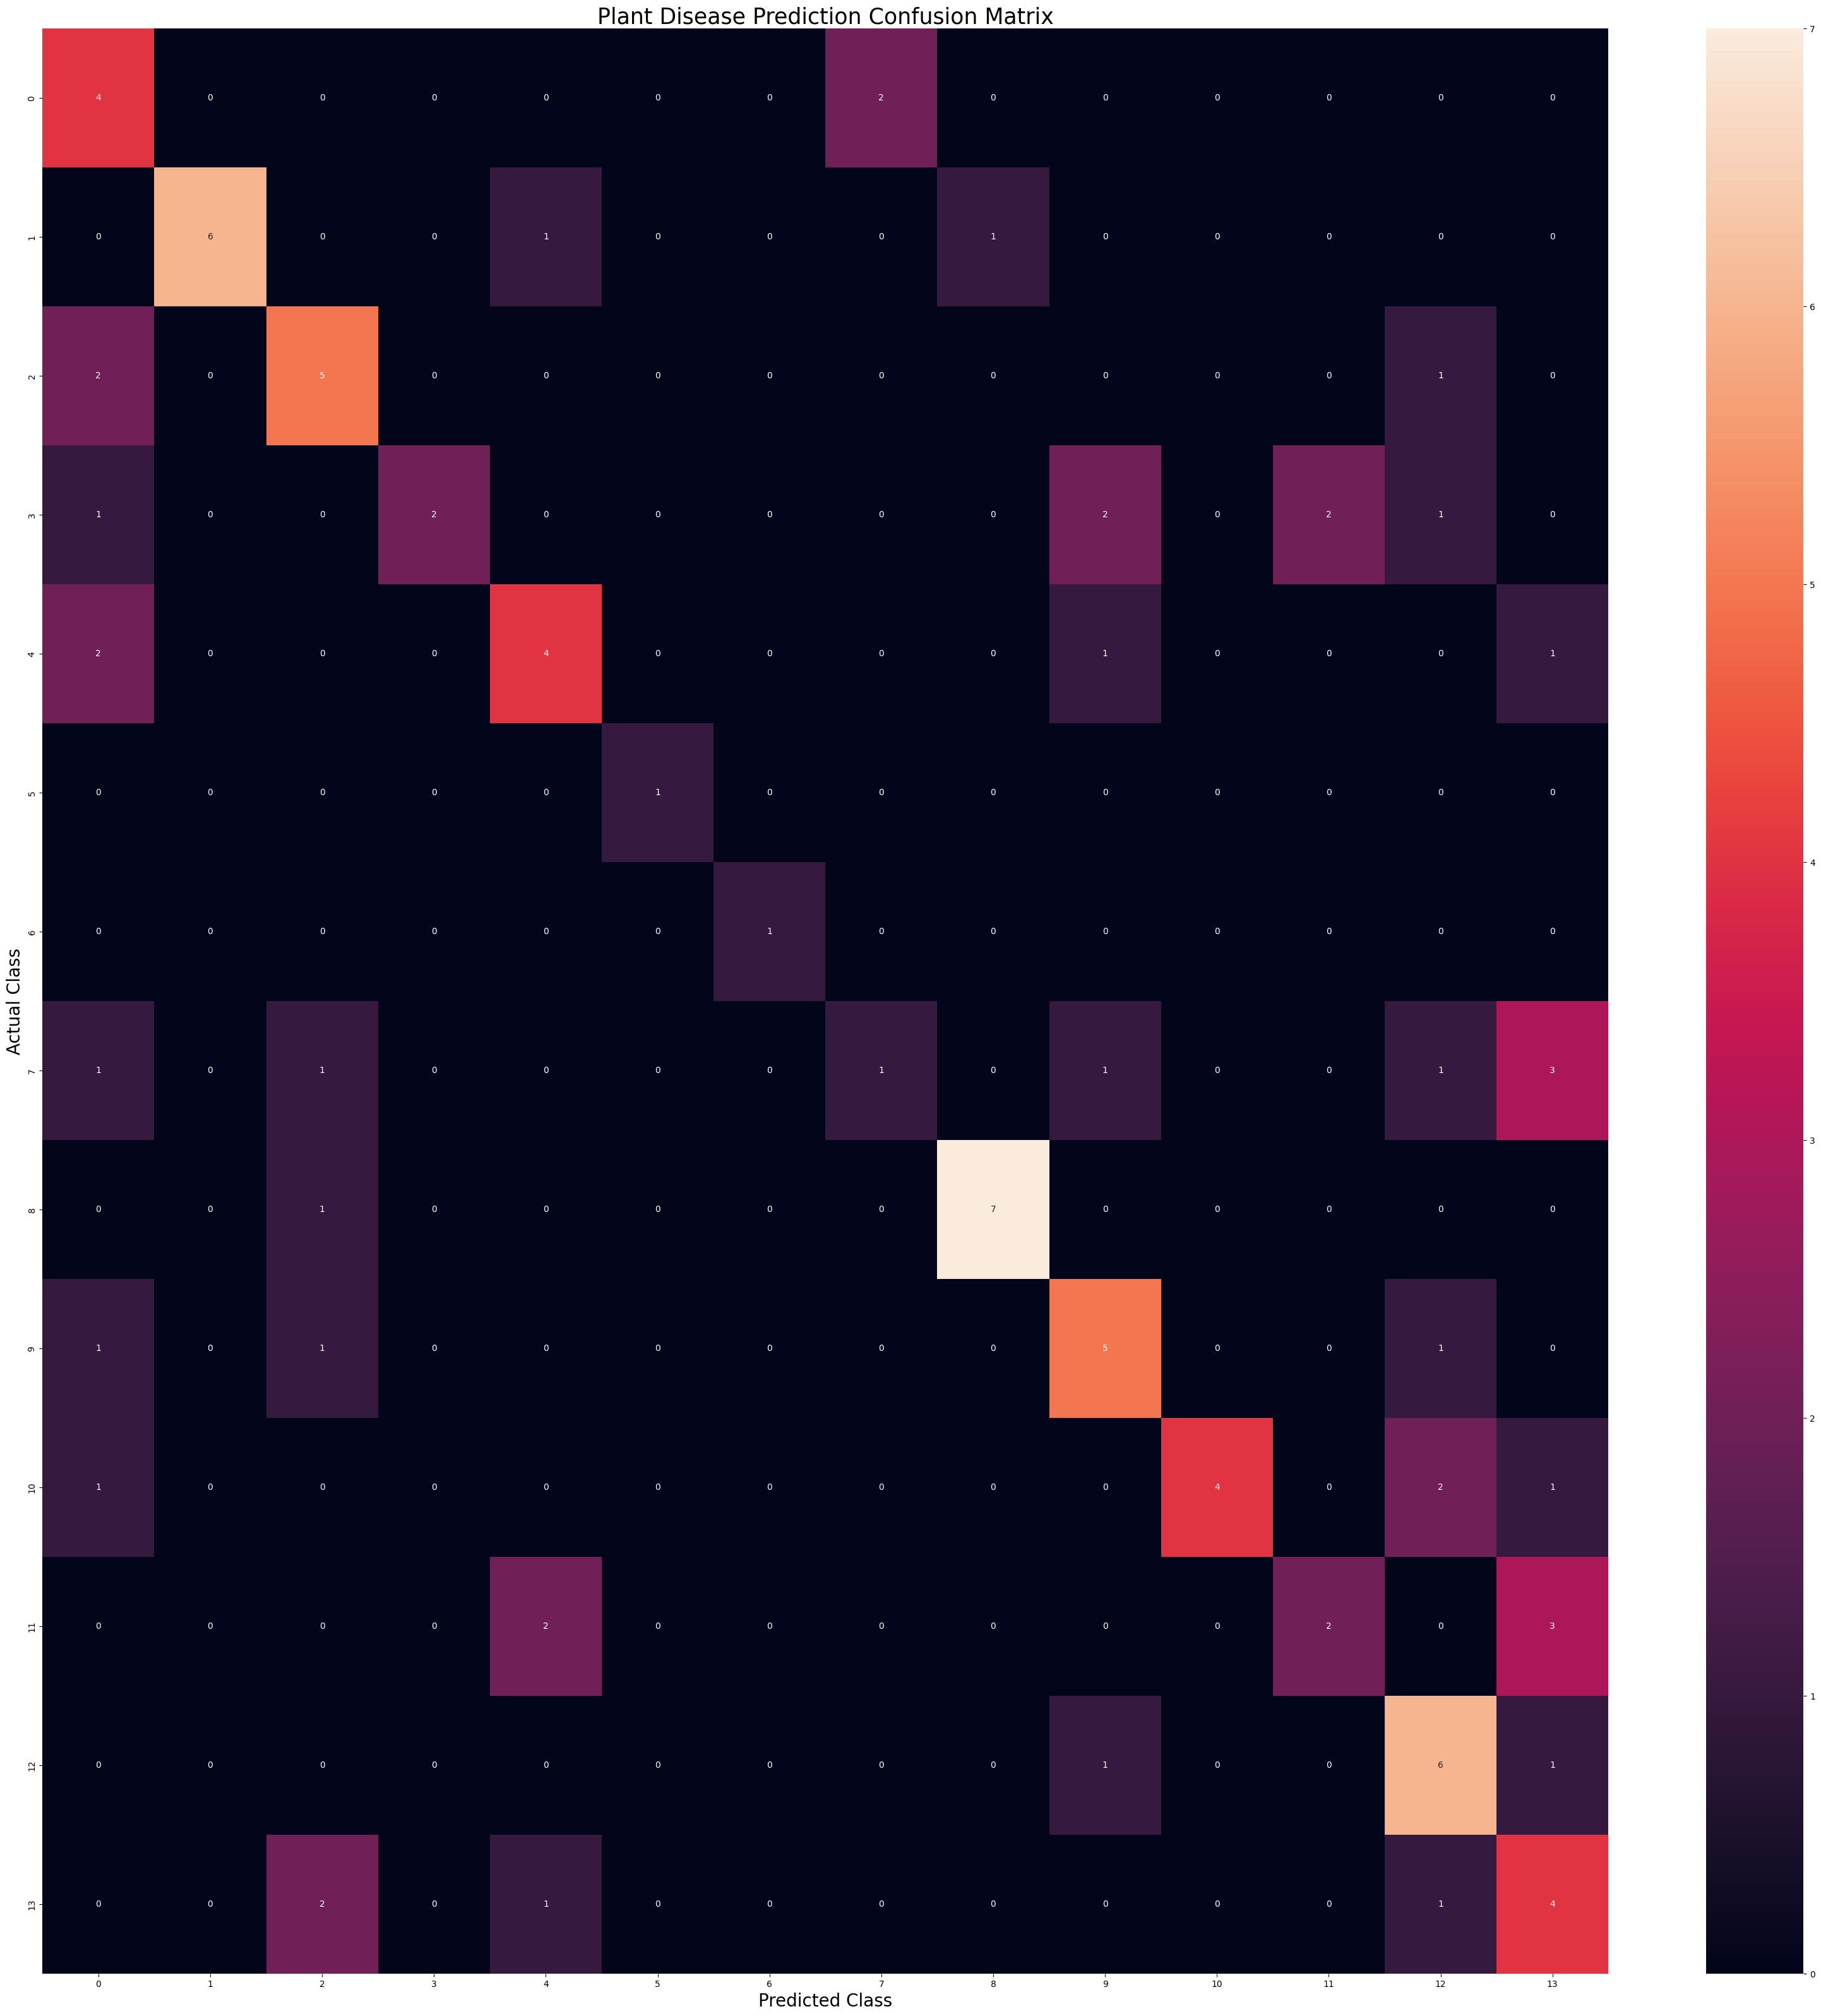

In [286]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})
plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()